# Load Image

### This code loads train & valid/test images and converts it to data frame

In [1]:
import cv2
import numpy as np
import pandas as pd
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt

def LoadImage(dirPath, trainFldr, validFldr, TrainCSVName, ValidCSVName):
    # Train Path
    TrainPath= dirPath + '\\' + trainFldr
    TrainCSVPath= dirPath + '\\' + TrainCSVName
    TrainCSV= pd.read_csv(TrainCSVPath, sep= ',', names= ["Label", "Image Path"])
    # TainLabel All Raws & Label
    #####################################SAMPLE ONLY 1000
    #TrainLabel= TrainCSV.iloc[:,0]
    TrainLabel= TrainCSV.iloc[:,0]
    TrainLabel= np.array(TrainLabel)
    
    # Valid/Test Path
    ValidPath= dirPath + '\\' + validFldr
    ValidCSVPath= dirPath + '\\' + ValidCSVName
    ValidCSV= pd.read_csv(ValidCSVPath, sep= ',', names= ["Label", "Image Path"])
    # ValidLabel All Raws & Label
    #####################################SAMPLE ONLY 1000
    #ValidLabel= ValidCSV.iloc[:,0]
    ValidLabel= ValidCSV.iloc[:,0]
    ValidLabel= np.array(ValidLabel)
    
    # Initialize train & valid/test images and labels
    print('\n [INFO] laoding images...')
    data=[]
    #label=[]
    
    # Load images, pre-process & store it
    i=0
    # i from 0 to length of TainLabel -1
    #####################################SAMPLE ONLY 1000
    #for i in range(len(TrainLabel)):
    for i in range(len(TrainLabel)):
        j=format(i, '0>5')
        imagePath= str(TrainPath + "\\" + "TrIm-" + j + ".png")
        
        image= cv2.imread(imagePath)
        image=cv2.resize(image, (150, 150))
        imageArr=img_to_array(image)
        #image= Image.open(imagePath).convert("L")
        #image= image.resize( (150, 150), 0)
        #imageArr= np.asarray(image)
        
        data.append(imageArr)
    
    # scale the raw pixel intensities to the range [0, 1]
    print('\n [INFO] scale the raw pixel...')
    data = np.array(data, dtype="float") / 255.0
    
    return data, TrainLabel;

    
# Load Image
Path= 'C:\\Users\\Moris\\MURA Code\\Shoulder'
TrnFldr= 'Train'
VldFldr= 'Valid'
TrnNm= 'Code-train_labeled_studies.csv'
VldNm= 'Code-valid_labeled_studies.csv'

dt, TrnLabel= LoadImage(Path, TrnFldr, VldFldr, TrnNm, VldNm)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
print('\n [INFO] partition the data...')
(trainX, testX, trainY, testY) = train_test_split(dt,TrnLabel, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

# construct the image generator for data augmentation
#aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
#                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
#                         horizontal_flip=True, fill_mode="nearest")




C:\Users\Moris\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



 [INFO] laoding images...

 [INFO] scale the raw pixel...

 [INFO] partition the data...


# Building Keras Model

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

input_shape= (150, 150, 3)
batch_size= 32
epochs= 5

classes = np.unique(trainY)
nClasses = len(classes)

model = Sequential()
#model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
model.add(Dense(nClasses, activation='softmax'))

#model.compile(loss='binary_crossentropy',
#              optimizer='rmsprop',
#              metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow(trainX, trainY, batch_size=16)
test_generator = test_datagen.flow(testX, testY, batch_size=16)

model.fit_generator(
    train_generator, steps_per_epoch= len(trainX) / batch_size,
    epochs=epochs,
    validation_data= test_generator,
    validation_steps= len(testX) / batch_size)

model.save_weights('first_try.h5')


Epoch 1/5
197/196 [==============================] - 132s 672ms/step - loss: 0.6936 - acc: 0.5149 - val_loss: 0.6928 - val_acc: 0.5142
Epoch 2/5
197/196 [==============================] - 134s 678ms/step - loss: 0.6934 - acc: 0.5071 - val_loss: 0.6928 - val_acc: 0.5142
Epoch 3/5
197/196 [==============================] - 135s 686ms/step - loss: 0.6931 - acc: 0.4900 - val_loss: 0.6930 - val_acc: 0.5142
Epoch 4/5
197/196 [==============================] - 138s 699ms/step - loss: 0.6934 - acc: 0.4883 - val_loss: 0.6932 - val_acc: 0.4858
Epoch 5/5
197/196 [==============================] - 137s 697ms/step - loss: 0.6928 - acc: 0.5203 - val_loss: 0.6944 - val_acc: 0.4858


# References:

### 1-Image Classification with Keras and Deep Learning
##### LeNet is a small Convolutional Neural Network
https://www.pyimagesearch.com/2017/12/11/image-classification-with-keras-and-deep-learning/
### 2-Grayscale to RGB Conversion
##### 33% of Red,	33% of Green, 33% of Blue
##### New grayscale image = ( (0.3 * R) + (0.59 * G) + (0.11 * B) )
https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm
### 3-Image Module
https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
### 4-Applying Convolutional Neural Network on the MNIST dataset
https://yashk2810.github.io/Applying-Convolutional-Neural-Network-on-the-MNIST-dataset/
### 5-classifier_from_little_data_script_1.py
https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d
### 6-How do I load train and test data from the local drive for a deep learning Keras model?
https://www.quora.com/How-do-I-load-train-and-test-data-from-the-local-drive-for-a-deep-learning-Keras-model
### 7-Image Preprocessing ImageDataGenerator class
https://keras.io/preprocessing/image/
### 8-Returning Multiple Values in Python
https://www.geeksforgeeks.org/g-fact-41-multiple-return-values-in-python/
### 9-Starter's Guide to building a CNN with keras (TF), openCV and google drive for image storage
https://github.com/chibuk/simple-cnn-keras-colaboratory/blob/master/Starter_s%20Guide%20to%20Convolutional%20Neural%20Networks%2C%20Part%201_%20Keras%20(TF)%20%2B%20OpenCV.ipynb
### 10-Create your first Image Recognition Classifier using CNN, Keras and Tensorflow backend
https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd
### 11-Building powerful image classification models using very little data
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Helping & Testing Code

In [8]:
from keras.preprocessing.image import img_to_array
import cv2
import matplotlib.pyplot as plt

xx= 'C:\\Users\\Moris\\MURA Code\\Shoulder\\Train\\TrIm-00011.png'
xx2= cv2.imread(xx)

xx2=cv2.resize(xx2, (120, 120))
xx2Arr=img_to_array(xx2)

#data.append(xx2)

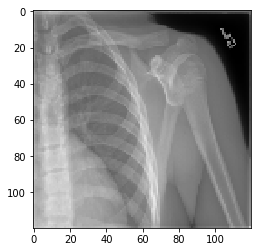

In [9]:
#cv2.imshow('color_image',xx2)
imgplot = plt.imshow(xx2)

In [10]:

if(len(xx2.shape)<3):
      print('gray')
elif len(xx2.shape)==3:
      print('Color(RGB)')
else:
      print('others')

Color(RGB)


[[193 187 182 ... 111 113 114]
 [187 182 175 ... 108 110 111]
 [182 179 171 ... 104 106 107]
 ...
 [215 210 202 ... 157 172 190]
 [219 216 209 ... 192 220 222]
 [225 220 216 ... 221 220 221]]


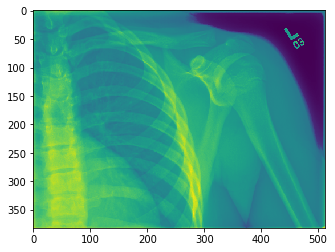

In [11]:
#xx3= cv2.imread(xx, cv2.IMREAD_GRAYSCALE)
xx3= cv2.imread(xx, 0)
#xx3 = xx3[:,:,0]
imgplot = plt.imshow(xx3)
print(xx3)

In [12]:
from PIL import Image
def is_grey_scale(img_path):
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True
asd1= is_grey_scale("C:\\Users\\Moris\\MURA Code\\Shoulder\\Train\\TrIm-00011.png")
print(asd1)

True


(120, 120, 3)
[[177. 167. 165. ... 106. 104. 108.]
 [167. 149. 143. ...  63.  73.  99.]
 [155. 136. 139. ...  14.  18.  91.]
 ...
 [202. 188. 183. ... 102. 113. 143.]
 [203. 186. 182. ... 109. 112. 142.]
 [211. 194. 190. ... 137. 138. 198.]]
(120, 120)


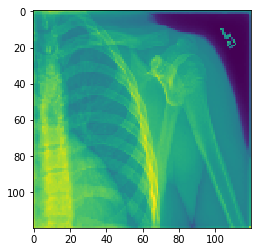

In [13]:
xx4=cv2.resize(xx2, (120, 120))
xx4=img_to_array(xx4)
yy1=xx4[:, : , 0]
print(xx4.shape)
#print(xx4)
print(yy1)
print(yy1.shape)
yy2=yy1
for k1 in range(120):
    for k2 in range(120):
        d1= yy1[k1, k2]
        yy2[k1, k2]= 0.3*d1 + 0.59*d1 + 0.11*d1
    
#imgplot = plt.imshow(yy1)
imgplot = plt.imshow(yy2)

In [14]:

xx4= xx4.ravel()
print(xx4)


[177. 177. 177. ... 198. 198. 198.]


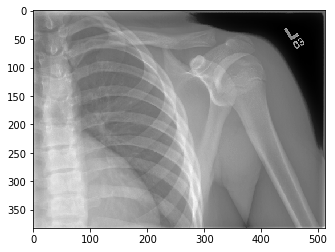

In [15]:
mz1= Image.open(xx).convert("L")
mz2= np.asarray(mz1)
plt.imshow(mz2, cmap='gray')
plt.show()

(382, 512)


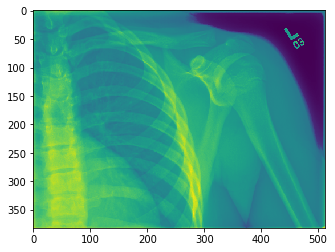

In [16]:
print(mz2.shape)
plt.imshow(mz2)

(120, 120)


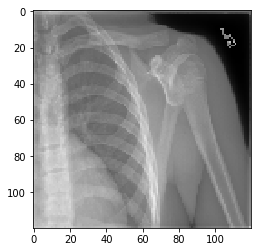

In [18]:
mz3=mz1.resize( (120, 120), 0)
plt.imshow(mz3)
mz4= np.asarray(mz3)
print(mz4.shape)

In [30]:
testY

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)